# 1. Getting Started: Airbnb Copenhagen

This assignment deals with the most recent Airbnb listings in Copenhagen. The data is collected from [Inside Airbnb](http://insideairbnb.com/copenhagen). Feel free to explore the website further in order to better understand the data. The data (*listings.csv*) has been collected as raw data and needs to be preprocessed.

**Hand-in:** Hand in as a group in Itslearning in a **single**, well-organized and easy-to-read Jupyter Notebook. Please just use this notebook to complete the assignment.

If your group consists of students from different classes, upload in **both** classes.

The first cell does some preprocessing. Please just run these cells and do not change anything. The assignment starts below. Make sure that listings.csv' is in the same folder as this notebook




<>:54: SyntaxWarning: invalid escape sequence '\$'
<>:54: SyntaxWarning: invalid escape sequence '\$'
/var/folders/xj/pqhwvlxn0mb8z0cx1qqkqlwc0000gn/T/ipykernel_76786/1243346704.py:54: SyntaxWarning: invalid escape sequence '\$'
  data_filtered['price'] = data_filtered['price'].replace('[\$,]', '', regex=True).astype(float)


,id,name,host_id,host_name,neighbourhood_cleansed,latitude,longitude,room_type,price,bedrooms,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,calculated_host_listings_count,availability_365,price_category
0,6983,Copenhagen 'N Livin',16774,Simon,Nørrebro,55.686410,12.547410,Entire home/apt,898.0,1.0,...,4.79,4.78,4.86,4.89,4.73,4.71,1.08,1,0,0
1,26057,Lovely house - most attractive area,109777,Kari,Indre By,55.693070,12.576490,Entire home/apt,2600.0,4.0,...,4.93,4.96,4.93,4.86,4.94,4.81,0.55,1,303,1
2,26473,City Centre Townhouse Sleeps 1-10 persons,112210,Julia,Indre By,55.676020,12.575400,Entire home/apt,3250.0,6.0,...,4.63,4.44,4.78,4.70,4.89,4.59,2.06,3,56,1
3,29118,Best Location in Cool Istedgade,125230,Nana,Vesterbro-Kongens Enghave,55.670230,12.555040,Entire home/apt,725.0,1.0,...,4.87,4.73,5.00,5.00,4.87,4.80,0.16,1,59,0
4,31094,"Beautiful, spacious, central, renovated Penthouse",129976,Ebbe,Vesterbro-Kongens Enghave,55.666602,12.555283,Entire home/apt,1954.0,4.0,...,4.82,4.88,4.87,4.82,4.80,4.53,0.13,1,0,1


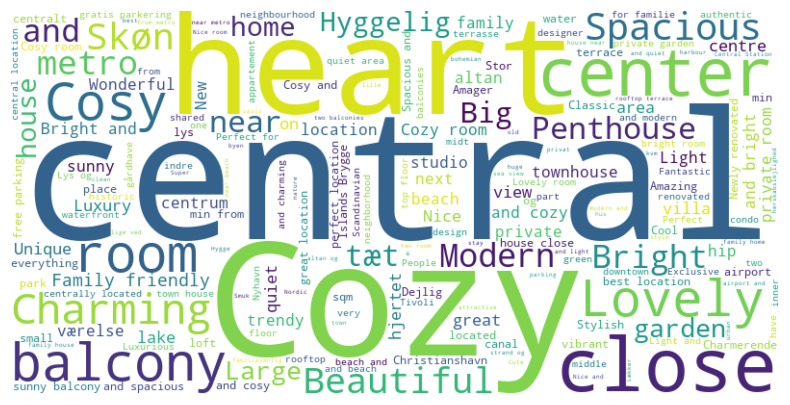

In [2]:
# pip install pandas
# pip install scikit-learn
import pandas as pd
import sklearn as sk

# load the data
data = pd.read_csv('listings.csv')

# filter relevant columns
data_limited = data[["id",
    "name",
    "host_id"  ,
    "host_name" , 
    "neighbourhood_cleansed"  ,
    "latitude"  ,
    "longitude"  ,
    "room_type"  ,
    "price"  ,
    'bedrooms'  ,
    'accommodates'  ,
    "minimum_nights"  ,
    "number_of_reviews",  
    "last_review"  ,
    "review_scores_rating"  ,
    "review_scores_accuracy" , 
    "review_scores_cleanliness"  ,
    "review_scores_checkin"  ,
    "review_scores_communication"  ,
    "review_scores_location"  ,
    "review_scores_value"  ,
    "reviews_per_month"  ,
    "calculated_host_listings_count"  ,
    "availability_365",]]

# removing rows with no reviews
data_filtered = data_limited.loc[data_limited['number_of_reviews'] != 0]

# remove nan
data_filtered = data_filtered.dropna()
data_filtered.head()

# get a list of distinct values from neighbourhood_cleansed columns in data_filtered
neighbourhoods = data_filtered["neighbourhood_cleansed"].unique()

# replace e.g. Nrrbro with Nørrebro in neighbourhood_cleansed column

data_filtered["neighbourhood_cleansed"] = data_filtered["neighbourhood_cleansed"].replace("Nrrebro", "Nørrebro")
data_filtered["neighbourhood_cleansed"] = data_filtered["neighbourhood_cleansed"].replace("sterbro", "Østerbro")
data_filtered["neighbourhood_cleansed"] = data_filtered["neighbourhood_cleansed"].replace("Vanlse", "Vanløse")
data_filtered["neighbourhood_cleansed"] = data_filtered["neighbourhood_cleansed"].replace("Brnshj-Husum", "Brønshøj-Husum")
neighbourhoods = data_filtered["neighbourhood_cleansed"].unique()

# Remove dollar signs and commas and convert to float - note the prices are actually in DKK
data_filtered['price'] = data_filtered['price'].replace('[\$,]', '', regex=True).astype(float)

# Calculate the median price
median_price = data_filtered['price'].median()

# Create a new column 'price_category' with 0 for 'affordable' and 1 for 'expensive'
data_filtered['price_category'] = (data_filtered['price'] > median_price).astype(int)

display(data_filtered.head())

# Describe the apartments using a wordcloud
# Remember to install packages
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine the two lists of stop words
stop_words = ['Østerbro', 'Copenhagen', 'København', 'in', 'bedroom', 'bedrooms', 'bed', 'beds', 'bath', 'baths', 'Frederiksberg', 'V', 'Ø', 'SV', 'S', 'N', 'K', 'C', 'W', 'kbh', 'Ballerup', 'Hellerup', 'Valby', 'Vanløse', 'Brønhøj', 'Nørrebro', 'Vesterbro', "CPH", "with", "to", "of", "a", "the", "på", "i", "med", "af", "at", "city", "by", "apartment", "appartment", "lejlighed", "flat", "m2", "apt"]

# Convert the 'name' column to a single string
text = ' '.join(data_filtered['name'].astype(str))

# Create and generate a word cloud image
wordcloud = WordCloud(stopwords=stop_words, background_color="white", width=800, height=400).generate(text)

# Display the generated word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Your tasks start here


### 1. Since data science is so much fun, provide a word cloud of the names of the hosts, removing any names of non-persons. Does this more or less correspond with the distribution of names according to [Danmarks Statistik](https://www.dst.dk/da/Statistik/emner/borgere/navne/navne-i-hele-befolkningen)?

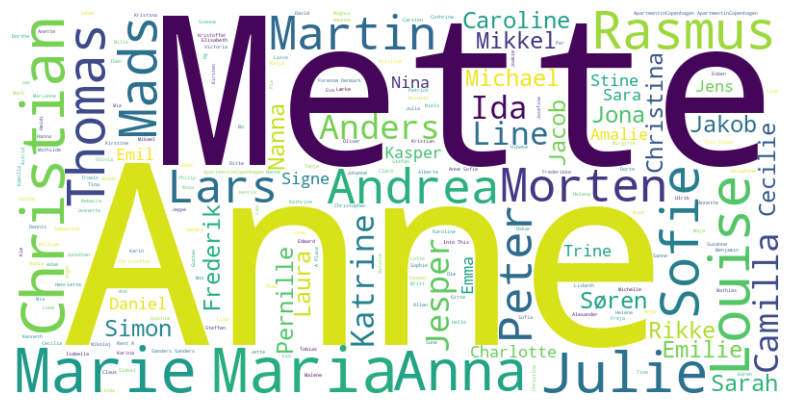

In [3]:
# State your solution here. Add more cells if needed.
# get a list of distinct values from neighbourhood_cleansed columns in data_filtered
host_names = data_filtered["host_name"]

# Splitting names including '/','&','og' or'and' with a wihtespace before (so it doesent split a name containing 'and' e.g. 'anders)
split_host_names = host_names.str.split(r'(?i)\s(?:og|and|/)|&')

# List of names that should not be split
name_exceptions = ['anne mette', 'jens peder', 'nina marie']  # Add more exceptions as needed

# Flatten the list of names, strip leading/trailing whitespace,
# and remove anything after the first space, except for names in the exceptions - This is to change e.g "Anders k." to 'Anders'
cleaned_names = [name.strip() if name.lower() in name_exceptions 
                 else name.strip().split(' ')[0] 
                 for sublist in split_host_names for name in sublist]

# Replacing whatespace with '-' so the wordcolud doesn't split e.g. 'Anne Marie'
cleaned_names = [name.replace(' ', '-') for name in cleaned_names]


# Defining stop words for woudcloud
stop_words = ['and', '&', '(Email hidden by Airbnb)', 'copenhagen']

# Convert the 'name' column to a single string
text = ' '.join(data_filtered['host_name'].astype(str))

# Create and generate a word cloud image
wordcloud = WordCloud(stopwords=stop_words, background_color="white", width=800, height=400).generate(text)

# Display the generated word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## If fits quite well with the name statistics in Denmark! Most common names are girlnames are: Anne, Mette,

### 2. Using non-scaled versions of latitude and longitude, plot the listings data on a map.

In [4]:
import folium

# Create a base map centered around the average location
map_center = [data_filtered["latitude"].mean(), data_filtered["longitude"].mean()]
mymap = folium.Map(location=map_center, zoom_start=12)

# Add markers for each latitude and longitude point (For demonstration pupose I only map 500 because else it lags a lot!)
for idx, row in data_filtered.head(500).iterrows():
    folium.Marker(location=[row["latitude"], row["longitude"]]).add_to(mymap)

# Display the map in Jupyter
mymap

### 3. Create boxplots where you have the neighbourhood on the x-axis and price on the y-axis. What does this tell you about the listings in Copenhagen? Keep the x-axis as is and move different variables into the y-axis to see how things are distributed between the neighborhoods to create different plots (your choice).

<Figure size 1200x800 with 0 Axes>

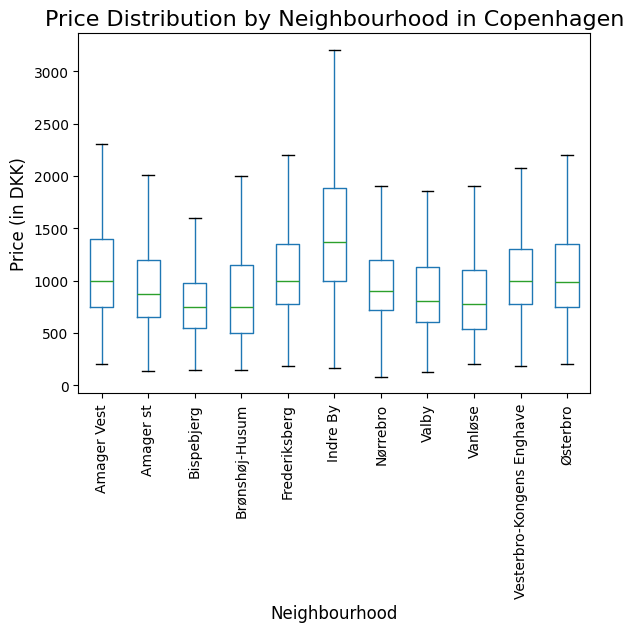

<Figure size 1200x800 with 0 Axes>

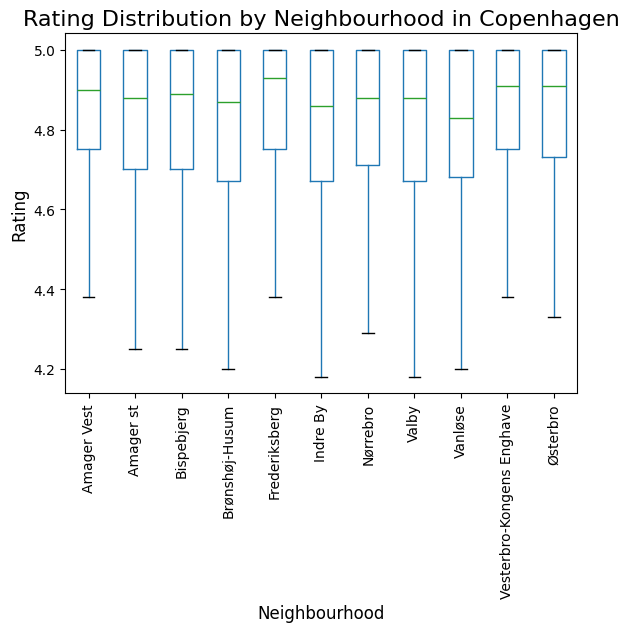

In [5]:
# State your solution here. Add more cells if needed.
# Assuming 'data_filtered' is already loaded and cleaned


# Create a boxplot with neighbourhood_cleansed on the x-axis and price on the y-axis - Hiding outliers
plt.figure(figsize=(12, 8))
data_filtered.boxplot(column='price', by='neighbourhood_cleansed', grid=False, rot=90, showfliers=False)

# Set the title and labels
plt.title('Price Distribution by Neighbourhood in Copenhagen', fontsize=16)
plt.suptitle('')  # Remove the automatic 'Boxplot grouped by neighbourhood_cleansed' title
plt.xlabel('Neighbourhood', fontsize=12)
plt.ylabel('Price (in DKK)', fontsize=12)

# Show the plot
plt.show()

# Create a boxplot with neighbourhood_cleansed on the x-axis and price on the y-axis - Hiding outliers/fliers
plt.figure(figsize=(12, 8))
data_filtered.boxplot(column='review_scores_rating', by='neighbourhood_cleansed', grid=False, rot=90, showfliers=False)

# Set the title and labels
plt.title('Rating Distribution by Neighbourhood in Copenhagen', fontsize=16)
plt.suptitle('')  # Remove the automatic 'Boxplot grouped by neighbourhood_cleansed' title
plt.xlabel('Neighbourhood', fontsize=12)
plt.ylabel('Rating', fontsize=12)

# Show the plot
plt.show()

# It tels more that prices are higher in indre by, both median price and the high


### 4. Do a descriptive analysis of the neighborhoods. Include information about room type in the analysis as well as one other self-chosen feature. The descriptive analysis should contain mean/average, mode, median, standard deviation/variance, minimum, maximum and quartiles.

In [6]:
# Group the data by 'neighbourhood_cleansed' and 'room_type' to calculate statistics for each group
descriptive_stats = data_filtered.groupby(['neighbourhood_cleansed', 'room_type']).agg(

    # Calculate the mean price for each group
    price_mean=('price', 'mean'),
    
    # Calculate the median price for each group
    price_median=('price', 'median'),
    
    # Calculate the mode (most frequent) price for each group
    price_mode=('price', lambda x: x.mode()[0] if not x.mode().empty else None),  # Use the first mode if available, otherwise None
    
    # Calculate the minimum price for each group
    price_min=('price', 'min'),
    
    # Calculate the maximum price for each group
    price_max=('price', 'max'),
    
    # Calculate the standard deviation of price for each group (measure of spread)
    price_std=('price', 'std'),
    
    # Calculate the variance of price for each group (another measure of spread)
    price_var=('price', 'var'),
    
    # Calculate the 1st quartile (25th percentile) of price for each group
    price_q1=('price', lambda x: x.quantile(0.25)),
    
    # Calculate the 3rd quartile (75th percentile) of price for each group
    price_q3=('price', lambda x: x.quantile(0.75)),
    
    # Calculate the mean availability (number of days available) for each group
    availability_mean=('availability_365', 'mean'),
    
    # Calculate the median availability for each group
    availability_median=('availability_365', 'median'),
    
    # Calculate the minimum availability for each group
    availability_min=('availability_365', 'min'),
    
    # Calculate the maximum availability for each group
    availability_max=('availability_365', 'max')
).reset_index()  # Reset the index to turn 'neighbourhood_cleansed' and 'room_type' into columns

# Print the resulting descriptive statistics DataFrame
print(descriptive_stats)


       neighbourhood_cleansed        room_type   price_mean  price_median  \
0                 Amager Vest  Entire home/apt  1244.602908        1065.0   
1                 Amager Vest     Private room  1033.326531         500.0   
2                 Amager Vest      Shared room  1051.500000        1051.5   
3                   Amager st  Entire home/apt  1089.601290         900.0   
4                   Amager st       Hotel room  1296.000000        1201.0   
5                   Amager st     Private room   553.520325         474.0   
6                   Amager st      Shared room  2575.000000        2575.0   
7                  Bispebjerg  Entire home/apt  1000.457831         800.0   
8                  Bispebjerg     Private room   493.204301         400.0   
9                  Bispebjerg      Shared room   198.000000         198.0   
10             Brønshøj-Husum  Entire home/apt  1024.075472         900.0   
11             Brønshøj-Husum     Private room   447.746032         400.0   

### 5. Based on self-chosen features, develop three different regression models that can predict the price of a rental property. Remember to divide your data into training data and test data. Comment on your findings.

In [7]:
# Import necessary libraries for model building, preprocessing, and evaluation
from sklearn.model_selection import train_test_split  # To split the data into training and testing sets
from sklearn.linear_model import LinearRegression  # Linear regression model
from sklearn.linear_model import SGDRegressor  # Stochastic Gradient Descent-based linear model
from sklearn.preprocessing import PolynomialFeatures  # To add polynomial terms to the feature set
from sklearn.linear_model import Ridge  # Ridge regression model with L2 regularization
from sklearn.metrics import mean_squared_error, r2_score  # For evaluating the model's performance
import numpy as np  # For numerical operations

# Select relevant columns from the filtered dataset
data = data_filtered[[
    "bedrooms",  # Number of bedrooms in the property
    "price",  # Target variable: price of the property
    "accommodates",  # Number of people the property can accommodate
    "accommodates",  # Duplicate column (should be removed or replaced by another relevant feature)
    "neighbourhood_cleansed"  # Categorical variable representing the neighborhood of the property
]]

# One-Hot Encode the 'neighbourhood_cleansed' column to convert the categorical variable into binary features
# This will create a separate column for each neighborhood (except the first one to avoid multicollinearity)
data_encoded = pd.get_dummies(data, columns=['neighbourhood_cleansed'], drop_first=True)

# 'drop_first=True' ensures that the first category in 'neighbourhood_cleansed' is dropped to avoid the "dummy variable trap"


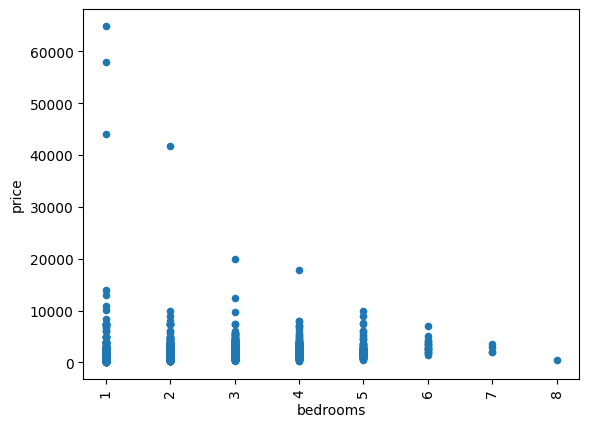

In [8]:
# Create the scatter plot
data.plot(x='bedrooms', y='price', kind='scatter',)

# Rotate the x-axis labels
plt.xticks(rotation=90)

# Show the plot

plt.show()

1161.9091594737283

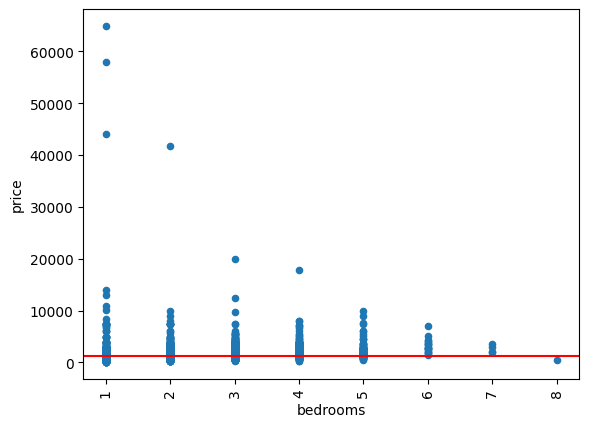

In [9]:
ax = data.plot(x='bedrooms', y='price', kind='scatter')
plt.xticks(rotation=90)

avg = np.average(data['price'])
ax.axhline(y = avg, color = 'r')
avg

In [10]:
# Define features (X) and target (y)
X = data_encoded.drop(['price'], axis=1)  # Drop 'price' to get feature set
y = data_encoded['price']  # Target variable

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
# Initialize the Linear Regression model
ols = LinearRegression()

# Fit the model to the training data (X_train: features, y_train: target variable 'price')
# The model learns the relationship between the features and the target variable
ols.fit(X_train, y_train)

# Extract the intercept (constant term) and the coefficients (weights for each feature)
intercept, coef = ols.intercept_, ols.coef_[0]  # coef_ gives the coefficients for all features
print("Intercept:", intercept)  # Intercept is the value of the target when all features are zero
print("Coefficient for the first feature:", coef)  # The effect of the first feature on the target

# Evaluate the model on the test set
# R² score measures how much variance in the target variable is explained by the model
# R² = 1 means perfect fit, R² = 0 means the model is no better than predicting the mean
r2_score = ols.score(X_test, y_test)
print("R² score:", r2_score)


Intercept: 478.3113050733325
Coefficient for the first feature: 150.36999753604715
R² score: 0.31003427341736334


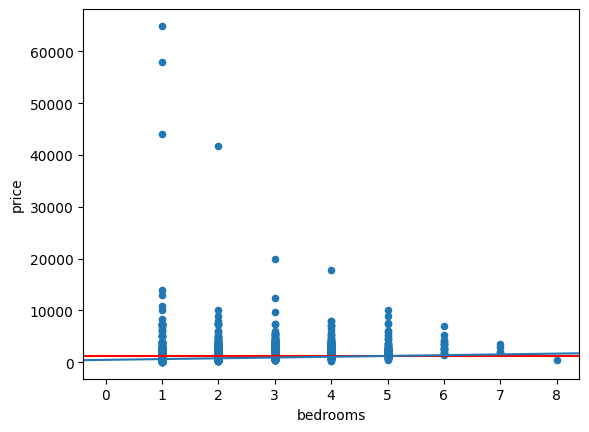

In [12]:
ax = data.plot(x='bedrooms', y='price', kind='scatter')
ax.axhline(y = avg, color = 'r')
ax.axline(xy1 = (0, intercept), slope = coef)

In [13]:
# Initialize the Stochastic Gradient Descent (SGD) Regressor
# alpha: regularization strength (L2 regularization)
# max_iter: number of iterations over the training data
# random_state: ensures reproducibility of the results
sgd = SGDRegressor(alpha=.01, max_iter=30, random_state=504)

# Fit the SGDRegressor model to the training data (X_train: features, y_train: target variable)
# The model will iteratively learn the weights using stochastic gradient descent
sgd.fit(X_train, y_train)

# Use the fitted model to make predictions on the test set (X_test)
y_predict = sgd.predict(X_test)  # Predicted values for the test set

# Evaluate the model's performance on the test set using R² score
# The R² score tells how well the model predicts the target variable (1 = perfect, 0 = mean prediction)
r2_score_sgd = sgd.score(X_test, y_test)
print("SGD R² score:", r2_score_sgd)


SGD R² score: 0.30674679559677553


In [14]:


# Initialize the Ridge Regression model with L2 regularization
# alpha: regularization strength (higher values increase regularization)
ridge = Ridge(alpha=1.0)

# Fit the Ridge Regression model to the training data (X_train: features, y_train: target variable)
# Ridge regression minimizes the loss function, but also applies L2 regularization to reduce overfitting
ridge.fit(X_train, y_train)

# Evaluate the Ridge model on the test set using the R² score
# The R² score measures how well the model explains the variance in the target variable (1 = perfect fit, 0 = mean prediction)
ridge_r2_score = ridge.score(X_test, y_test)
print("Ridge R² score:", ridge_r2_score)


Ridge R² score: 0.31009523157640895


In [15]:
from sklearn.ensemble import RandomForestRegressor


# Initialize the Random Forest Regressor
# n_estimators: number of decision trees in the forest (100 trees in this case)
# random_state: ensures reproducibility by controlling the randomness
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the Random Forest model to the training data (X_train: features, y_train: target variable)
# The model trains by building multiple decision trees and averaging their predictions to minimize overfitting
rf.fit(X_train, y_train)

# Evaluate the Random Forest model on the test set using the R² score
# The R² score measures how well the model explains the variance in the target variable (1 = perfect fit, 0 = mean prediction)
rf_r2_score = rf.score(X_test, y_test)
print("Random Forest R² score:", rf_r2_score)


Random Forest R² score: 0.28680214013194283


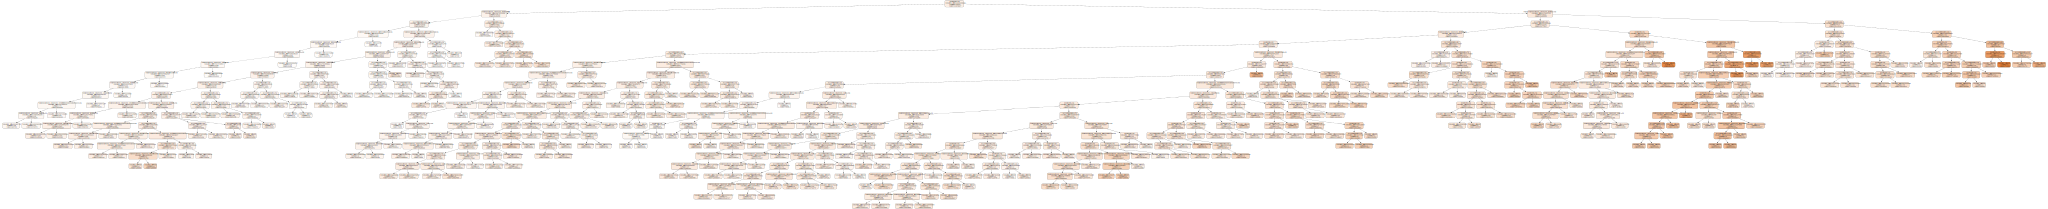

In [16]:
from sklearn.tree import export_graphviz
import graphviz
from sklearn.ensemble import RandomForestRegressor

# Train the Random Forest Regressor
rf = RandomForestRegressor(n_estimators=1, random_state=42)
rf.fit(X_train, y_train)

# Extract one tree from the forest (for example, the first tree)
tree = rf.estimators_[0]

# Export the tree to a Graphviz format
dot_data = export_graphviz(tree, out_file=None, 
                           feature_names=X_train.columns,  # Use feature names from the dataset
                           filled=True, rounded=True, 
                           special_characters=True)

# Draw the tree using Graphviz
graph = graphviz.Source(dot_data)  
graph.render("random_forest_tree")  # Saves the tree visualization to a file
graph  # Display the tree in the notebook or interactive environment


In [18]:
# The differnt models are almost scoring the same - Lieear regression being slighly best

# R² value of ≈ 0.30 menas the model can explain 30% of the variance in the dependent variable